
#Deep Learning con Python



### Autor: Erwing FC 

#### ~erwingforerocastro@gmail.com 


##Clasificacion de imagenes
En el siguiente ejemplo se trataran imagenes de perros y gatos, donde entrenaremos una red para clasificarlas.

In [0]:
from google.colab import files
files.upload() #subimos el archivo
import os
import zipfile
local_zip='/content/cats_and_dogs_small.zip' #ruta donde guarda los archivos colab
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Saving cats_and_dogs_small.zip to cats_and_dogs_small.zip


In [0]:
base_dir='/tmp/cats_and_dogs_small'  #ruta donde se descomprimio el archivo

#rutas secundarias
train_dir= os.path.join(base_dir,'train')
test_dir= os.path.join(base_dir,'test')
validation_dir= os.path.join(base_dir,'validation')

#imagenes de entrenamiento 50%
train_dogs_dir=os.path.join(train_dir,'dogs')
train_cats_dir=os.path.join(train_dir,'cats')

#imagenes de prueba  25%
test_dogs_dir=os.path.join(test_dir,'dogs')
test_cats_dir=os.path.join(test_dir,'cats')

#imagenes de validacion 25%
validation_dogs_dir=os.path.join(validation_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')

In [0]:
#nombres de los ficheros de las primeras 5 imagenes
train_cat_fnames = os.listdir( train_cats_dir ) 
print(train_cat_fnames[:5]) 

train_dog_fnames = os.listdir( train_dogs_dir ) 
print(train_dog_fnames[:5]) 

validation_cat_fnames = os.listdir( validation_cats_dir ) 
print(validation_cat_fnames[:5]) 

validation_dog_fnames = os.listdir( validation_dogs_dir ) 
print(validation_dog_fnames[:5]) 

test_cat_fnames = os.listdir( test_cats_dir ) 
print(test_cat_fnames[:5]) 

test_dog_fnames = os.listdir( test_dogs_dir ) 
print(test_dog_fnames[:5])

In [0]:
#cantidad de imagenes en los directorios

print('total training cat images:', len(os.listdir(train_cats_dir ) )) 
print('total training dog images:', len(os.listdir(train_dogs_dir ) )) 
print('total validation cat images :', len(os.listdir( validation_cats_dir ) )) 
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) )) 
print('total test cat images :', len(os.listdir( test_cats_dir ) )) 
print('total test dog images :', len(os.listdir( test_dogs_dir ) )) 

In [0]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
#funcion para mostrar las imagenes
def print_pictures(dir,fnames):
  #presentamos las imagenes 4x4
  nrows=4
  ncols=4
  pic_index=0 #indice para iterar sobre las imagenes

  fig=plt.gcf()
  fig.set_size_inches(ncols*4,nrows*4)

  pic_index+=8
  
  next_pix=[os.path.join(dir,fname)
             for fname in fnames[pic_index-8:pic_index]] #las primeras 8 imagenes del fichero

  for i,img_path in enumerate(next_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    img=mpimg.imread(img_path)
    plt.imshow(img)
  
  plt.show()

print("Figura 10.3") 
print_pictures(train_cats_dir, train_cat_fnames) 
print("Figura 10.4") 
print_pictures(train_dogs_dir, train_dog_fnames) 
print("Figura 10.5") 
print_pictures(validation_cats_dir, validation_cat_fnames) 
print("Figura 10.6") 
print_pictures(validation_dogs_dir, validation_dog_fnames) 
print("Figura 10.7") 
print_pictures(test_cats_dir, test_cat_fnames) 
print("Figura 10.8") 
print_pictures(test_dogs_dir, test_dog_fnames)


In [0]:
#importamos librerias
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',
                 input_shape=(150,150,3)))    #vamos a escalar todas las imagenes a 150 x 150 con profundidad 3 RGB
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

In [0]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
 
test_datagen=ImageDataGenerator(rescale=1.0/255.)
validation_datagen=ImageDataGenerator(rescale=1.0/255.)

#flow(data,labels) cuando no se tiene directorio en nuestro caso usamos este:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))

test_generator=test_datagen.flow_from_directory(test_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))

validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))

In [0]:
batch_size=20
steps_per_epoch=train_generator.n // batch_size
validation_steps=validation_generator.n//batch_size
print(steps_per_epoch)
print(validation_steps)

In [0]:
#entrenamiento del modelo
history = model.fit (train_generator, 
                     steps_per_epoch= steps_per_epoch,
                     epochs=20, 
                     validation_data = validation_generator, 
                     validation_steps = validation_steps)

In [0]:
history_dic=history.history
print(history_dic.keys())
acc = history.history[ 'acc' ] 
val_acc = history.history[ 'val_acc' ] 
loss = history.history[ 'loss' ] 
val_loss = history.history['val_loss']

In [0]:
epochs=range(1,len(acc)+1,1)
plt.plot(epochs,acc,'r--',label='Entrenamiento Prec')
plt.plot(epochs,val_acc,'b',label='Validación Prec')
plt.title('Entrenamiento y validacion precisión')
plt.ylabel('Prec.')
plt.xlabel('Entrenamientos')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'r--',label='Entrenamiento Error')
plt.plot(epochs,val_loss,'b',label='Validación Error')
plt.title('Entrenamiento y validacion perdida')
plt.ylabel('Error')
plt.xlabel('Entrenamientos')
plt.legend()
plt.figure()

In [0]:
#el modelo sufre de sobre entrenamiento
test_lost, test_acc= model.evaluate (test_generator) 
print ("Test presición:", test_acc)

Saving Wiliams-foto1.jpg to Wiliams-foto1 (2).jpg
[[1.]]


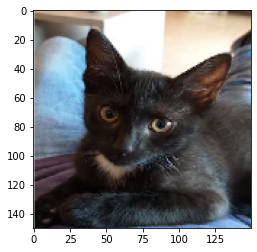

Wiliams-foto1.jpg is dog


In [0]:
#probamos
import numpy as np
from tensorflow.keras.preprocessing import image
#subimos una imagen
uploaded=files.upload()
fn=list(uploaded.keys())[0]
path='/content/'+fn
img=image.load_img(path,target_size=(150,150))


x=image.img_to_array(img)
image=np.expand_dims(x,axis=0)
classes=model.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0:print(f'{fn} es un perro')
else: print(f'{fn} es un gato')
#227